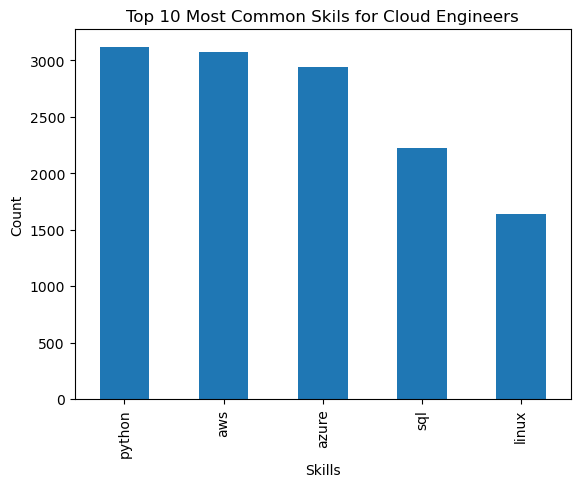

In [1]:
#importing libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df_CE = df[df['job_title_short'] == 'Cloud Engineer']
df_exploded = df_CE.explode('job_skills')
skill_counts = df_exploded['job_skills'].value_counts().head()
skill_counts.plot(kind='bar')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.title('Top 10 Most Common Skils for Cloud Engineers')
plt.show()

In [3]:
import pandas as pd
from datasets import load_dataset
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df_exploded = df.explode('job_skills')
skill_salary_avg = df_exploded.groupby('job_skills')['salary_year_avg'].mean().reset_index()
skill_salary_avg = skill_salary_avg.sort_values(by='salary_year_avg', ascending=False).head()

skill_salary_avg

,job_skills,salary_year_avg
46,debian,196500.000000
177,ringcentral,182500.000000
114,lua,170500.000000
126,mongo,169526.929749
54,dplyr,160667.210526


In [4]:
import pandas as pd
from datasets import load_dataset
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df_exploded = df.explode('job_skills')

# Group by 'job_title_short' and count unique skills
unique_skills_count = df_exploded.groupby('job_title_short')['job_skills'].nunique().reset_index()
unique_skills_count.columns = ['job_title_short', 'num_unique_skills']
unique_skills_count.head()

,job_title_short,num_unique_skills
0,Business Analyst,223
1,Cloud Engineer,213
2,Data Analyst,235
3,Data Engineer,239
4,Data Scientist,237
